In [1]:
import warnings

In [2]:
%pylab inline

import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


### Оставим только те ячейки из которых совершается больше 5 поездок в час

In [3]:
data = pd.read_csv('tabl_05_2016.csv', sep = ';')
data['mean'] = [sum(data.loc[i])/data.shape[1] for i in range(data.shape[0])]
data = data.loc[data['mean'] > 5]
data.drop(['mean'], axis='columns', inplace = True)
data

,01.05 00:00,01.05 01:00,01.05 02:00,01.05 03:00,01.05 04:00,01.05 05:00,01.05 06:00,01.05 07:00,01.05 08:00,01.05 09:00,...,31.05 14:00,31.05 15:00,31.05 16:00,31.05 17:00,31.05 18:00,31.05 19:00,31.05 20:00,31.05 21:00,31.05 22:00,31.05 23:00
1075,71.0,37.0,10.0,14.0,6.0,8.0,10.0,21.0,17.0,23.0,...,124.0,105.0,80.0,84.0,106.0,106.0,99.0,84.0,83.0,34.0
1076,64.0,39.0,46.0,25.0,20.0,12.0,16.0,48.0,61.0,83.0,...,214.0,208.0,156.0,202.0,213.0,167.0,166.0,173.0,98.0,77.0
1077,52.0,13.0,8.0,6.0,4.0,6.0,7.0,16.0,24.0,64.0,...,104.0,69.0,67.0,109.0,173.0,171.0,165.0,107.0,127.0,58.0
1125,81.0,38.0,34.0,23.0,22.0,5.0,23.0,18.0,15.0,27.0,...,96.0,70.0,68.0,109.0,126.0,88.0,65.0,78.0,94.0,53.0
1126,259.0,121.0,86.0,59.0,64.0,46.0,68.0,69.0,89.0,112.0,...,205.0,213.0,168.0,250.0,281.0,293.0,301.0,256.0,174.0,118.0
1127,535.0,465.0,410.0,241.0,148.0,44.0,44.0,49.0,75.0,129.0,...,261.0,258.0,189.0,266.0,337.0,401.0,350.0,340.0,345.0,211.0
1128,691.0,686.0,621.0,355.0,155.0,44.0,31.0,52.0,91.0,162.0,...,287.0,274.0,199.0,293.0,380.0,433.0,404.0,416.0,415.0,331.0
1129,994.0,1024.0,843.0,591.0,297.0,85.0,60.0,93.0,130.0,233.0,...,247.0,248.0,179.0,215.0,290.0,284.0,351.0,426.0,411.0,338.0
1130,1100.0,1292.0,1368.0,1250.0,701.0,160.0,64.0,85.0,107.0,191.0,...,322.0,313.0,297.0,363.0,411.0,428.0,444.0,493.0,490.0,434.0
1131,193.0,310.0,327.0,342.0,191.0,27.0,22.0,25.0,40.0,56.0,...,179.0,194.0,144.0,171.0,243.0,222.0,190.0,173.0,144.0,121.0


### Сохраняем отобраные ячейки, оставляем только эти ячейки в апреле

In [4]:
index = data.index

In [5]:
data = pd.read_csv('tabl_04_2016.csv', sep = ';')
data = data.loc[index]
data.head()

,01.04 00:00,01.04 01:00,01.04 02:00,01.04 03:00,01.04 04:00,01.04 05:00,01.04 06:00,01.04 07:00,01.04 08:00,01.04 09:00,...,30.04 14:00,30.04 15:00,30.04 16:00,30.04 17:00,30.04 18:00,30.04 19:00,30.04 20:00,30.04 21:00,30.04 22:00,30.04 23:00
1075,46.0,25.0,12.0,8.0,9.0,7.0,16.0,43.0,70.0,59.0,...,138.0,145.0,162.0,142.0,157.0,121.0,107.0,91.0,100.0,92.0
1076,55.0,44.0,23.0,9.0,13.0,28.0,76.0,154.0,217.0,205.0,...,318.0,299.0,214.0,234.0,223.0,209.0,208.0,155.0,97.0,118.0
1077,31.0,16.0,13.0,4.0,4.0,13.0,48.0,146.0,200.0,145.0,...,144.0,147.0,112.0,111.0,124.0,145.0,99.0,108.0,85.0,63.0
1125,67.0,46.0,20.0,20.0,16.0,19.0,42.0,77.0,103.0,81.0,...,91.0,91.0,75.0,97.0,111.0,101.0,107.0,115.0,100.0,86.0
1126,171.0,90.0,58.0,32.0,33.0,63.0,115.0,150.0,237.0,224.0,...,289.0,287.0,264.0,332.0,339.0,345.0,290.0,318.0,217.0,284.0


### Стандартизируем ряды

In [6]:
data[data.columns] =  StandardScaler().fit_transform(data)
data.head()

,01.04 00:00,01.04 01:00,01.04 02:00,01.04 03:00,01.04 04:00,01.04 05:00,01.04 06:00,01.04 07:00,01.04 08:00,01.04 09:00,...,30.04 14:00,30.04 15:00,30.04 16:00,30.04 17:00,30.04 18:00,30.04 19:00,30.04 20:00,30.04 21:00,30.04 22:00,30.04 23:00
1075,-0.440365,-0.473565,-0.476046,-0.454157,-0.478897,-0.596152,-0.545416,-0.542396,-0.495571,-0.506864,...,-0.213600,-0.196402,-0.075396,-0.228374,-0.233243,-0.376832,-0.374808,-0.422422,-0.403203,-0.436765
1076,-0.402149,-0.348375,-0.370321,-0.441332,-0.403428,-0.209078,-0.130507,-0.048428,0.040353,0.046768,...,0.505845,0.390898,0.143009,0.122545,-0.018765,-0.118689,-0.043141,-0.216464,-0.411725,-0.365039
1077,-0.504060,-0.532866,-0.466435,-0.505457,-0.573234,-0.485560,-0.324131,-0.084030,-0.021624,-0.180752,...,-0.189618,-0.188775,-0.285400,-0.346618,-0.340481,-0.306429,-0.401078,-0.367714,-0.445813,-0.516767
1125,-0.351193,-0.335197,-0.399155,-0.300257,-0.346826,-0.374967,-0.365622,-0.391091,-0.375261,-0.423440,...,-0.401455,-0.402339,-0.440803,-0.400019,-0.382727,-0.435500,-0.374808,-0.345188,-0.403203,-0.453317
1126,0.090421,-0.045283,-0.033923,-0.146356,-0.026081,0.436046,0.139184,-0.066229,0.113268,0.118816,...,0.389934,0.345134,0.353013,0.496349,0.358195,0.280258,0.226134,0.308085,-0.070849,0.092903


### Выбираем оптимальное количество кластеров

Используем коэффициент силуэта

In [7]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.6879529439524791
For n_clusters = 3 The average silhouette_score is : 0.6328913936561977
For n_clusters = 4 The average silhouette_score is : 0.5943033479661798
For n_clusters = 5 The average silhouette_score is : 0.5844719564225446
For n_clusters = 6 The average silhouette_score is : 0.579353505328451


В качестве оптимального количества выберем n = 4

### Обучаем модель

In [8]:
model = KMeans(n_clusters = 4, random_state = 1)
res = model.fit_predict(data)

In [9]:
data = pd.read_csv('tabl_04_2016.csv', sep = ';')
data = data.loc[index]

In [10]:
data['clust'] = res
data.head()

,01.04 00:00,01.04 01:00,01.04 02:00,01.04 03:00,01.04 04:00,01.04 05:00,01.04 06:00,01.04 07:00,01.04 08:00,01.04 09:00,...,30.04 15:00,30.04 16:00,30.04 17:00,30.04 18:00,30.04 19:00,30.04 20:00,30.04 21:00,30.04 22:00,30.04 23:00,clust
1075,46.0,25.0,12.0,8.0,9.0,7.0,16.0,43.0,70.0,59.0,...,145.0,162.0,142.0,157.0,121.0,107.0,91.0,100.0,92.0,0
1076,55.0,44.0,23.0,9.0,13.0,28.0,76.0,154.0,217.0,205.0,...,299.0,214.0,234.0,223.0,209.0,208.0,155.0,97.0,118.0,3
1077,31.0,16.0,13.0,4.0,4.0,13.0,48.0,146.0,200.0,145.0,...,147.0,112.0,111.0,124.0,145.0,99.0,108.0,85.0,63.0,0
1125,67.0,46.0,20.0,20.0,16.0,19.0,42.0,77.0,103.0,81.0,...,91.0,75.0,97.0,111.0,101.0,107.0,115.0,100.0,86.0,0
1126,171.0,90.0,58.0,32.0,33.0,63.0,115.0,150.0,237.0,224.0,...,287.0,264.0,332.0,339.0,345.0,290.0,318.0,217.0,284.0,3


In [11]:
clust0 = data.loc[data['clust'] == 0].T
clust1 = data.loc[data['clust'] == 1].T
clust2 = data.loc[data['clust'] == 2].T
clust3 = data.loc[data['clust'] == 3].T

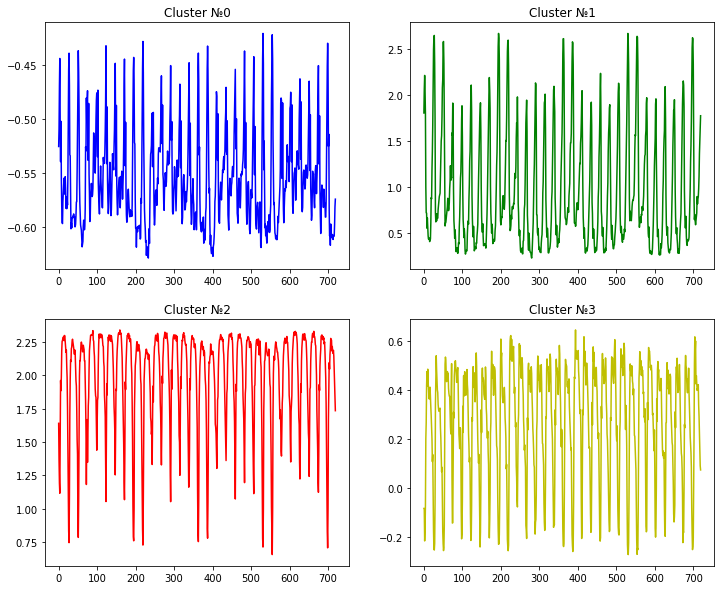

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(list(range(data.shape[1] - 1)), model.cluster_centers_[0], color = 'b')
ax[0, 1].plot(list(range(data.shape[1] - 1)), model.cluster_centers_[1], color = 'g', label = 'Cluster №1')
ax[1, 0].plot(list(range(data.shape[1] - 1)), model.cluster_centers_[2], color = 'r', label = 'Cluster №2')
ax[1, 1].plot(list(range(data.shape[1] - 1)), model.cluster_centers_[3], color = 'y', label = 'Cluster №3')
ax[0, 0].set_title('Cluster №0')
ax[0, 1].set_title('Cluster №1')
ax[1, 0].set_title('Cluster №2')
ax[1, 1].set_title('Cluster №3')
plt.show()

### Подберем параметры для каждого кластера

In [13]:
center_0 = pd.DataFrame(model.cluster_centers_[0])
center_0.columns = ['trip']
center_1 = pd.DataFrame(model.cluster_centers_[1])
center_1.columns = ['trip']
center_2 = pd.DataFrame(model.cluster_centers_[2])
center_2.columns = ['trip']
center_3 = pd.DataFrame(model.cluster_centers_[3])
center_3.columns = ['trip']

In [14]:
def k_opt(data):
    mse_list = []
    for number in range (1, 50):
        ols_data = data.copy()
        for i in range(1, number+1):        
            ols_data['s_'+str(i)] = np.sin(np.arange(1, data.shape[0]+1)*2*np.pi*i/168)
            ols_data['c_'+str(i)] = np.cos(np.arange(1, data.shape[0]+1)*2*np.pi*i/168)
        y = ols_data.trip
        X = ols_data.loc[:, 's_1':]
        try:
            model = LinearRegression()
            res = model.fit(X, y)
            mse_list.append(mean_squared_error(y, res.predict(X)))
        except LinAlgError:
            print('wrong parameters:', number)
            continue
        except ValueError:
            print('wrong :', number)
            continue
    K_opt = np.argmin(mse_list)
    print( 'Минимальное квадратичное отклонение достигнуто при K =', K_opt)

In [15]:
print('Cluster №0')
k_opt(center_0)
print('Cluster №1')
k_opt(center_1)
print('Cluster №2')
k_opt(center_2)
print('Cluster №3')
k_opt(center_3)

Cluster №0
Минимальное квадратичное отклонение достигнуто при K = 48
Cluster №1
Минимальное квадратичное отклонение достигнуто при K = 48
Cluster №2
Минимальное квадратичное отклонение достигнуто при K = 48
Cluster №3
Минимальное квадратичное отклонение достигнуто при K = 48


In [16]:
K = 23
def pred(data, K):
    for i in range(1, K+1):        
        data['s_'+str(i)] = np.sin(np.arange(1, data.shape[0]+1)*2*np.pi*i/168)
        data['c_'+str(i)] = np.cos(np.arange(1, data.shape[0]+1)*2*np.pi*i/168)
    y = data.trip
    X = data.loc[:, 's_1':]
    model = LinearRegression()
    res = model.fit(X, y)
    y_pred = res.predict(X)
    data['l_prediction'] = y_pred
    data['error'] = y - y_pred

In [17]:
pred(center_0, K)
pred(center_1, K)
pred(center_2, K)
pred(center_3, K)

Cluster 0


<Figure size 1080x720 with 0 Axes>

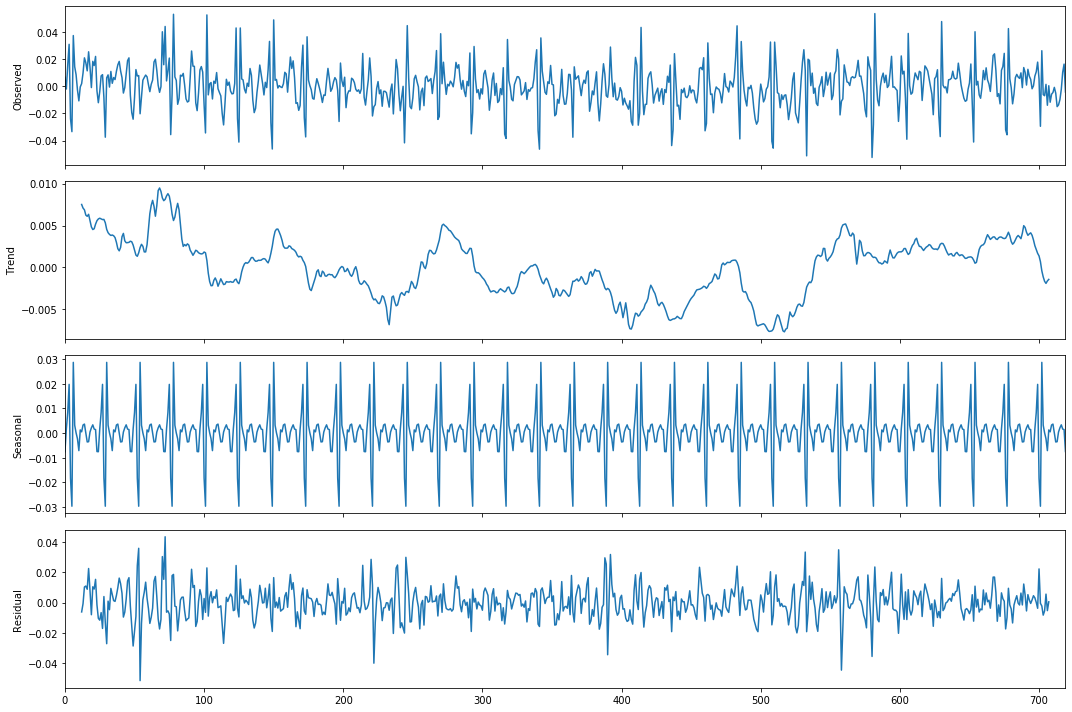

In [18]:
print('Cluster 0')
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(center_0['error'], freq = 24).plot()
plt.show()

### Произведем 1 дифференнцирование, что бы точно избавится от тренда

<Figure size 1080x720 with 0 Axes>

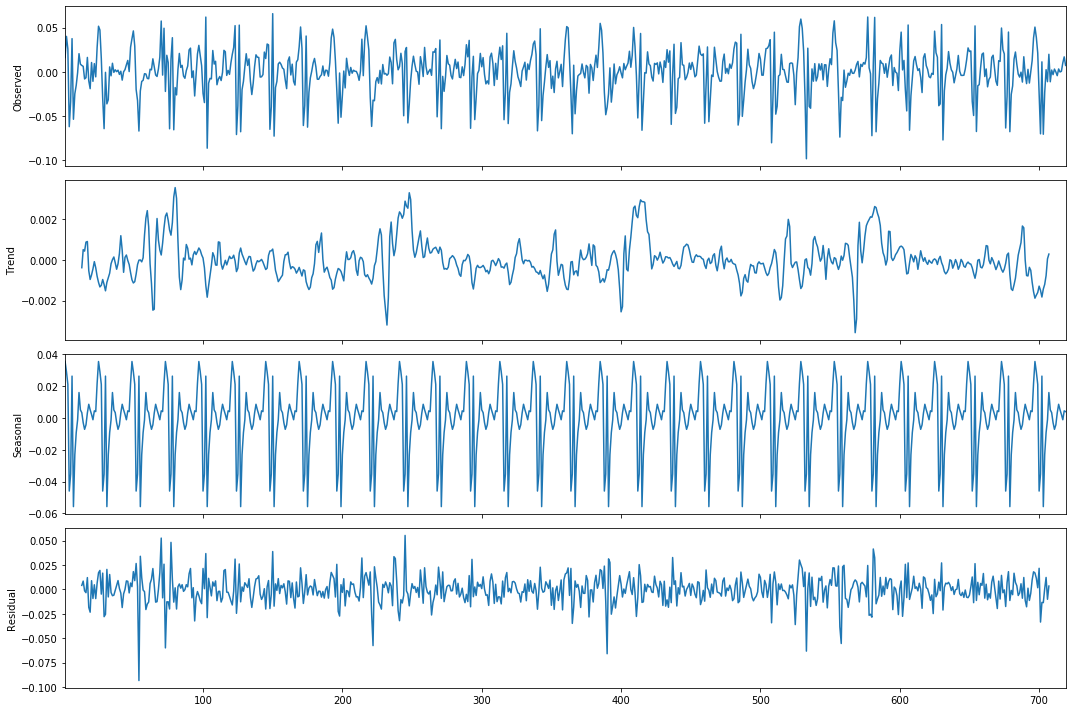

In [19]:
center_0['trips_diff'] = center_0.trip - center_0.trip.shift(1)
center_1['trips_diff'] = center_1.trip - center_1.trip.shift(1)
center_2['trips_diff'] = center_2.trip - center_2.trip.shift(1)
center_3['trips_diff'] = center_3.trip - center_3.trip.shift(1)

plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(center_0.trips_diff[1:], freq = 24).plot()
plt.show()

### Подбираем параметры q, p, Q, P для каждого кластера

Cluster 1


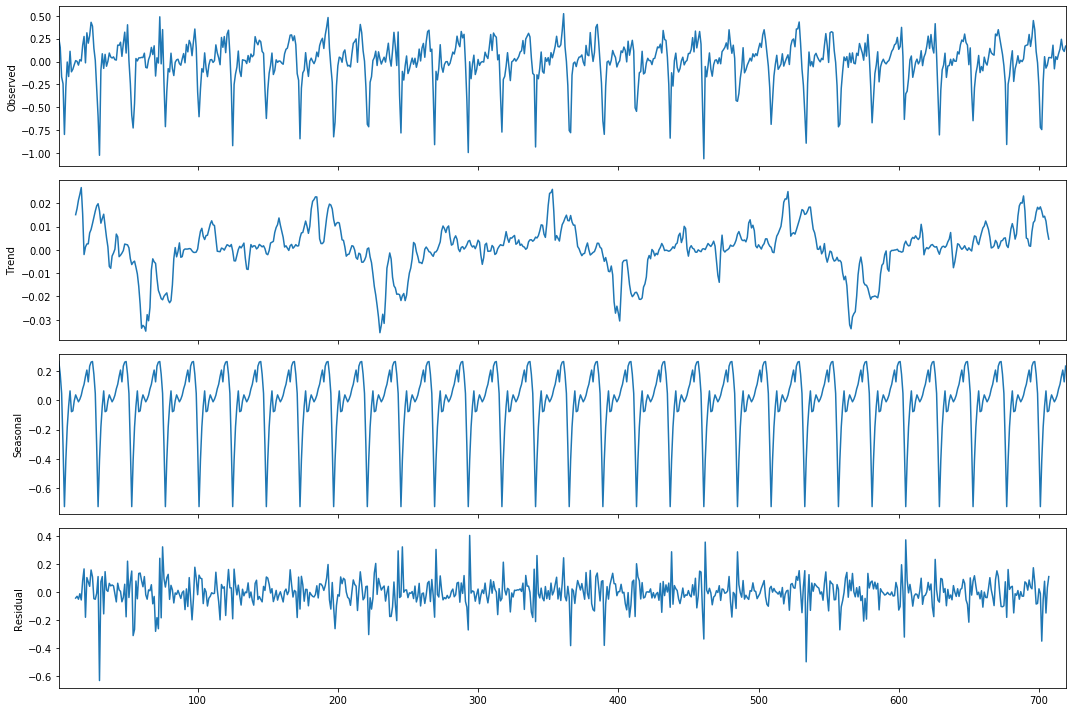

In [20]:
print('Cluster 1')
sm.tsa.seasonal_decompose(center_1['trips_diff'][1:], freq = 24).plot()
plt.show()

Cluster 2


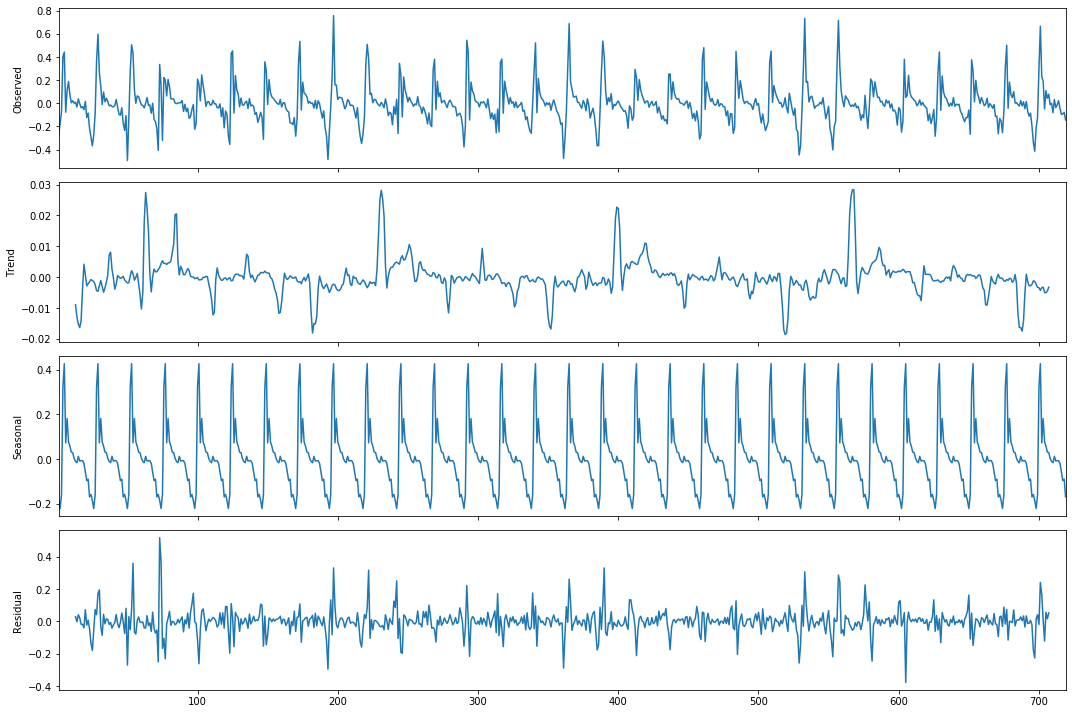

In [21]:
print('Cluster 2')
sm.tsa.seasonal_decompose(center_2['trips_diff'][1:], freq = 24).plot()
plt.show()

Cluster 3


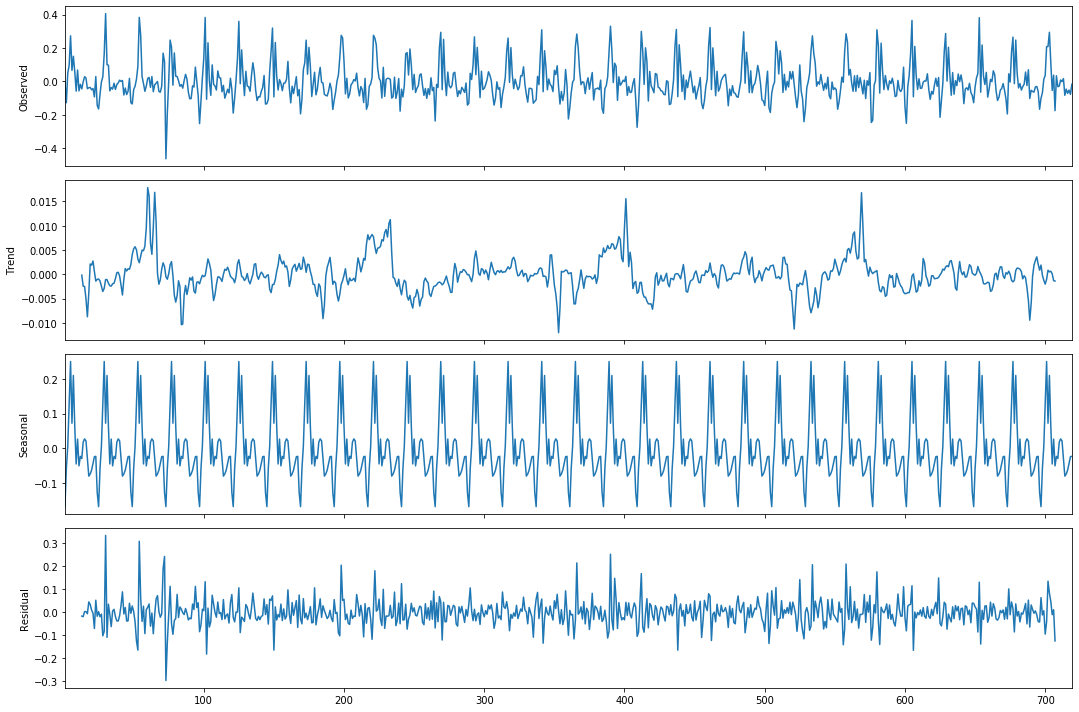

In [22]:
print('Cluster 3')
sm.tsa.seasonal_decompose(center_3['trips_diff'][1:], freq = 24).plot()
plt.show()

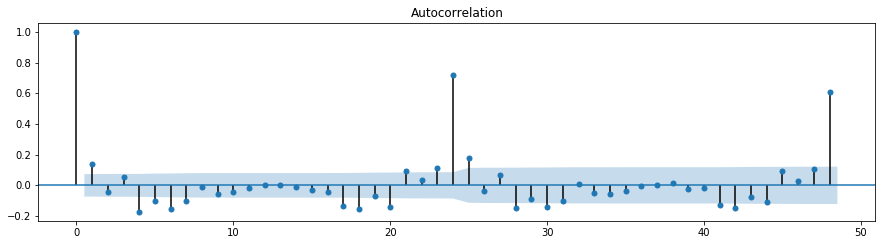

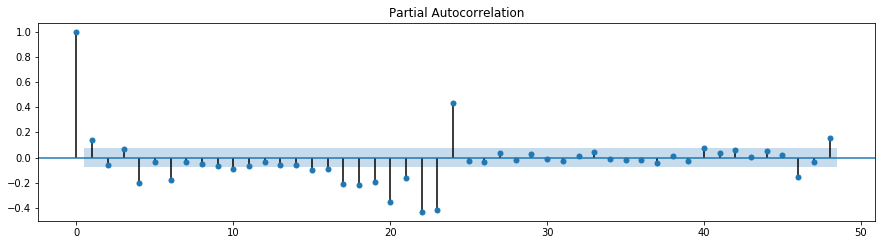

In [23]:
plt.figure(figsize = (15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(center_0['trips_diff'][1:].values.squeeze(), lags=48, ax=ax)
pylab.show()
plt.figure(figsize = (15,8))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(center_0['trips_diff'][1:].values.squeeze(), lags=48, ax=ax)
pylab.show()

In [24]:
q_0 = range(0, 3)
Q_0 = range(0, 2)
p_0 = range(0, 3)
P_0 = range(0, 2)
d = 1
D = 0

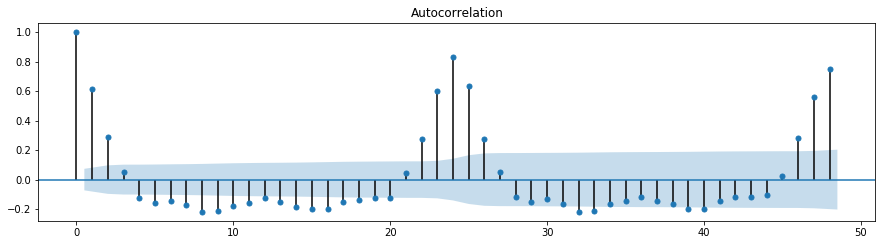

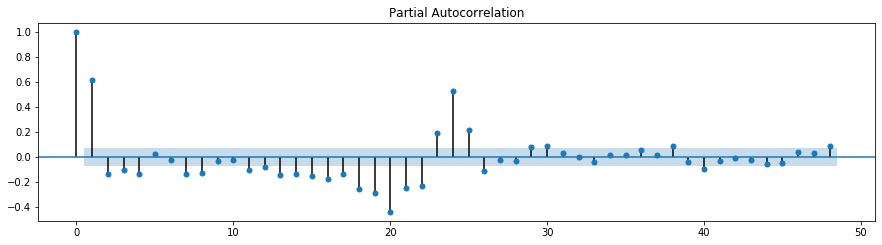

In [25]:
plt.figure(figsize = (15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(center_1['trips_diff'][1:].values.squeeze(), lags=48, ax=ax)
pylab.show()
plt.figure(figsize = (15,8))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(center_1['trips_diff'][1:].values.squeeze(), lags=48, ax=ax)
pylab.show()

In [26]:
q_1 = range(0, 3)
Q_1 = range(0, 2)
p_1 = range(0, 5)
P_1 = range(0, 2)

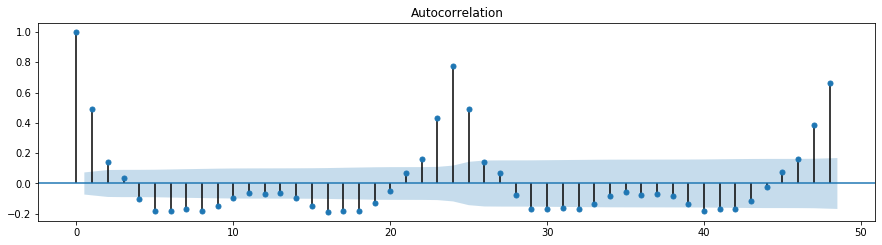

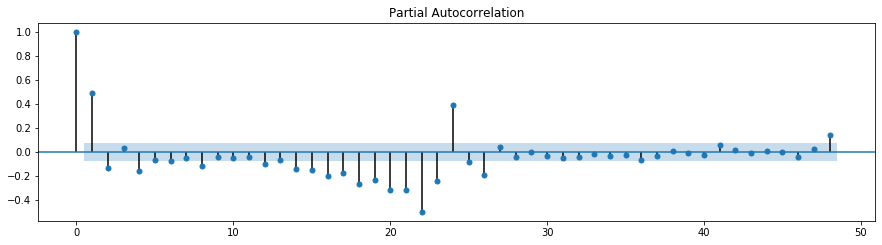

In [27]:
plt.figure(figsize = (15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(center_2['trips_diff'][1:].values.squeeze(), lags=48, ax=ax)
pylab.show()
plt.figure(figsize = (15,8))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(center_2['trips_diff'][1:].values.squeeze(), lags=48, ax=ax)
pylab.show()

In [28]:
q_2 = range(0, 4)
Q_2 = range(0, 2)
p_2 = range(0, 4)
P_2 = range(0, 2)

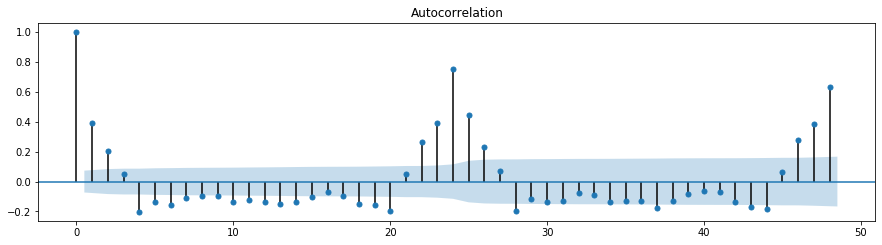

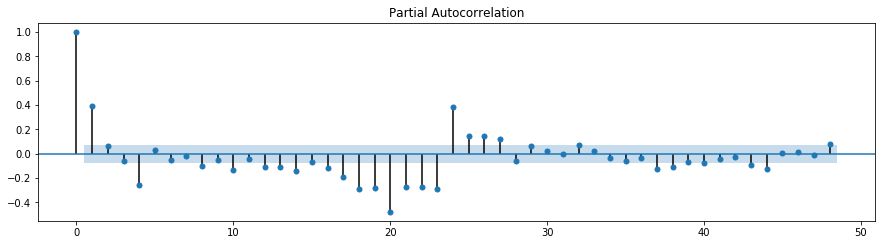

In [29]:
plt.figure(figsize = (15,8))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(center_3['trips_diff'][1:].values.squeeze(), lags=48, ax=ax)
pylab.show()
plt.figure(figsize = (15,8))
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(center_3['trips_diff'][1:].values.squeeze(), lags=48, ax=ax)
pylab.show()

In [30]:
q_3 = range(0, 4)
Q_3 = range(0, 2)
p_3 = range(0, 3)
P_3 = range(0, 2)

In [31]:
parameters_0 = product(p_0, q_0, P_0, Q_0)
parameters_list_0 = list(parameters_0)
len(parameters_list_0)

36

In [32]:
parameters_1 = product(p_1, q_1, P_1, Q_1)
parameters_list_1 = list(parameters_1)
len(parameters_list_1)

60

In [33]:
parameters_2 = product(p_2, q_2, P_2, Q_2)
parameters_list_2 = list(parameters_2)
len(parameters_list_2)

64

In [34]:
parameters_3 = product(p_3, q_3, P_3, Q_3)
parameters_list_3 = list(parameters_3)
len(parameters_list_3)

48

In [35]:
def best_models(data, parameters_list):   
    results = []
    best_aic = float("inf")
    warnings.filterwarnings('ignore')

    for param in parameters_list:
        #try except нужен, потому что на некоторых наборах параметров модель не обучается
        print(param)
        try:
            model=sm.tsa.statespace.SARIMAX(data.trip, exog = data[data.columns[1:2*K+1]], order=(param[0], 1, param[1]), 
                                            seasonal_order=(param[2], 0, param[3], 24)).fit(disp=-1)
        #выводим параметры, на которых модель не обучается и переходим к следующему набору
        except ValueError:
            print('wrong parameters:', param)
            continue
        except LinAlgError :
            print('wrong:', param)
            continue
        aic = model.aic
        #сохраняем лучшую модель, aic, параметры
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    warnings.filterwarnings('default')
    return best_model, best_param, results

In [36]:
%%time
best_model_0, param_0, results_0= best_models(center_0, parameters_list_0)

(0, 0, 0, 0)
(0, 0, 0, 1)
(0, 0, 1, 0)
(0, 0, 1, 1)
(0, 1, 0, 0)
(0, 1, 0, 1)
(0, 1, 1, 0)
(0, 1, 1, 1)
(0, 2, 0, 0)
(0, 2, 0, 1)
(0, 2, 1, 0)
(0, 2, 1, 1)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 1, 0)
(1, 0, 1, 1)
(1, 1, 0, 0)
(1, 1, 0, 1)
(1, 1, 1, 0)
(1, 1, 1, 1)
(1, 2, 0, 0)
(1, 2, 0, 1)
(1, 2, 1, 0)
(1, 2, 1, 1)
(2, 0, 0, 0)
(2, 0, 0, 1)
(2, 0, 1, 0)
(2, 0, 1, 1)
(2, 1, 0, 0)
(2, 1, 0, 1)
(2, 1, 1, 0)
(2, 1, 1, 1)
(2, 2, 0, 0)
(2, 2, 0, 1)
(2, 2, 1, 0)
(2, 2, 1, 1)
Wall time: 34min 42s


In [37]:
f = open('param0.txt','w')  # открытие в режиме записи
f.write(str(param_0))
f.close()

In [38]:
%%time
best_model_1, param_1, results_1 = best_models(center_1, parameters_list_1)

(0, 0, 0, 0)
(0, 0, 0, 1)
(0, 0, 1, 0)
(0, 0, 1, 1)
(0, 1, 0, 0)
(0, 1, 0, 1)
(0, 1, 1, 0)
(0, 1, 1, 1)
(0, 2, 0, 0)
(0, 2, 0, 1)
(0, 2, 1, 0)
(0, 2, 1, 1)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 1, 0)
(1, 0, 1, 1)
(1, 1, 0, 0)
(1, 1, 0, 1)
(1, 1, 1, 0)
(1, 1, 1, 1)
(1, 2, 0, 0)
(1, 2, 0, 1)
(1, 2, 1, 0)
(1, 2, 1, 1)
(2, 0, 0, 0)
(2, 0, 0, 1)
(2, 0, 1, 0)
(2, 0, 1, 1)
(2, 1, 0, 0)
(2, 1, 0, 1)
(2, 1, 1, 0)
(2, 1, 1, 1)
(2, 2, 0, 0)
(2, 2, 0, 1)
(2, 2, 1, 0)
(2, 2, 1, 1)
(3, 0, 0, 0)
(3, 0, 0, 1)
(3, 0, 1, 0)
(3, 0, 1, 1)
(3, 1, 0, 0)
(3, 1, 0, 1)
(3, 1, 1, 0)
(3, 1, 1, 1)
(3, 2, 0, 0)
(3, 2, 0, 1)
(3, 2, 1, 0)
(3, 2, 1, 1)
(4, 0, 0, 0)
(4, 0, 0, 1)
(4, 0, 1, 0)
(4, 0, 1, 1)
(4, 1, 0, 0)
(4, 1, 0, 1)
(4, 1, 1, 0)
(4, 1, 1, 1)
(4, 2, 0, 0)
(4, 2, 0, 1)
(4, 2, 1, 0)
(4, 2, 1, 1)
Wall time: 43min 52s


In [39]:
f = open('param1.txt','w')  # открытие в режиме записи
f.write(str(param_1))
f.close()

In [40]:
%%time
best_model_2, param_2, results_2 = best_models(center_2, parameters_list_2)

(0, 0, 0, 0)
(0, 0, 0, 1)
(0, 0, 1, 0)
(0, 0, 1, 1)
(0, 1, 0, 0)
(0, 1, 0, 1)
(0, 1, 1, 0)
(0, 1, 1, 1)
(0, 2, 0, 0)
(0, 2, 0, 1)
(0, 2, 1, 0)
(0, 2, 1, 1)
(0, 3, 0, 0)
(0, 3, 0, 1)
(0, 3, 1, 0)
(0, 3, 1, 1)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 1, 0)
(1, 0, 1, 1)
(1, 1, 0, 0)
(1, 1, 0, 1)
(1, 1, 1, 0)
(1, 1, 1, 1)
(1, 2, 0, 0)
(1, 2, 0, 1)
(1, 2, 1, 0)
(1, 2, 1, 1)
(1, 3, 0, 0)
(1, 3, 0, 1)
(1, 3, 1, 0)
(1, 3, 1, 1)
(2, 0, 0, 0)
(2, 0, 0, 1)
(2, 0, 1, 0)
(2, 0, 1, 1)
(2, 1, 0, 0)
(2, 1, 0, 1)
(2, 1, 1, 0)
(2, 1, 1, 1)
(2, 2, 0, 0)
(2, 2, 0, 1)
(2, 2, 1, 0)
(2, 2, 1, 1)
(2, 3, 0, 0)
(2, 3, 0, 1)
(2, 3, 1, 0)
(2, 3, 1, 1)
(3, 0, 0, 0)
(3, 0, 0, 1)
(3, 0, 1, 0)
(3, 0, 1, 1)
(3, 1, 0, 0)
(3, 1, 0, 1)
(3, 1, 1, 0)
wrong: (3, 1, 1, 0)
(3, 1, 1, 1)
(3, 2, 0, 0)
(3, 2, 0, 1)
(3, 2, 1, 0)
(3, 2, 1, 1)
(3, 3, 0, 0)
(3, 3, 0, 1)
(3, 3, 1, 0)
(3, 3, 1, 1)
Wall time: 45min 47s


In [41]:
f = open('param2.txt','w')  # открытие в режиме записи
f.write(str(param_2))
f.close()

In [42]:
%%time
best_model_3, param_3, results_3 = best_models(center_3, parameters_list_3)

(0, 0, 0, 0)
(0, 0, 0, 1)
(0, 0, 1, 0)
(0, 0, 1, 1)
(0, 1, 0, 0)
(0, 1, 0, 1)
(0, 1, 1, 0)
(0, 1, 1, 1)
(0, 2, 0, 0)
(0, 2, 0, 1)
(0, 2, 1, 0)
(0, 2, 1, 1)
(0, 3, 0, 0)
(0, 3, 0, 1)
(0, 3, 1, 0)
(0, 3, 1, 1)
(1, 0, 0, 0)
(1, 0, 0, 1)
(1, 0, 1, 0)
(1, 0, 1, 1)
(1, 1, 0, 0)
(1, 1, 0, 1)
(1, 1, 1, 0)
(1, 1, 1, 1)
(1, 2, 0, 0)
(1, 2, 0, 1)
(1, 2, 1, 0)
(1, 2, 1, 1)
(1, 3, 0, 0)
(1, 3, 0, 1)
(1, 3, 1, 0)
(1, 3, 1, 1)
(2, 0, 0, 0)
(2, 0, 0, 1)
(2, 0, 1, 0)
(2, 0, 1, 1)
(2, 1, 0, 0)
(2, 1, 0, 1)
(2, 1, 1, 0)
(2, 1, 1, 1)
(2, 2, 0, 0)
(2, 2, 0, 1)
(2, 2, 1, 0)
(2, 2, 1, 1)
(2, 3, 0, 0)
(2, 3, 0, 1)
(2, 3, 1, 0)
(2, 3, 1, 1)
Wall time: 33min 40s


In [43]:
f = open('param3.txt','w')  # открытие в режиме записи
f.write(str(param_3))
f.close()

In [44]:
print(best_model_3.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               trip   No. Observations:                  720
Model:             SARIMAX(0, 1, 2)x(1, 0, 1, 24)   Log Likelihood                1159.265
Date:                            Sat, 05 Dec 2020   AIC                          -2216.531
Time:                                    16:40:14   BIC                          -1983.060
Sample:                                         0   HQIC                         -2126.392
                                            - 720                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
s_1           -0.0036      0.005     -0.710      0.478      -0.013       0.006
c_1           -0.0221      0.005   

### Обучаем модель для каждой зоны

In [46]:
%%time
models = dict()
for i in data.index:
    data_copy = pd.DataFrame()
    clust = data.loc[i][-1]
    print(clust)
    data_copy['trip'] = data.loc[i][:-1]
    for j in range(1, K+1):        
        data_copy['s_'+str(j)] = np.sin(np.arange(1, data_copy.shape[0]+1)*2*np.pi*j/168)
        data_copy['c_'+str(j)] = np.cos(np.arange(1, data_copy.shape[0]+1)*2*np.pi*j/168)
    try:
        if clust == 0:
            model=sm.tsa.statespace.SARIMAX(data_copy.trip, exog = data_copy[data_copy.columns[1:2*K+1]], 
                                            order=(param_0[0], 1, param_0[1]), 
                                            seasonal_order=(param_0[2], 0, param_0[3], 24)).fit(disp=-1)
        if clust == 1:
            model=sm.tsa.statespace.SARIMAX(data_copy.trip, exog = data_copy[data_copy.columns[1:2*K+1]], 
                                            order=(param_1[0], 1, param_1[1]), 
                                            seasonal_order=(param_1[2], 0, param_1[3], 24)).fit(disp=-1)
        if clust == 2:
            model=sm.tsa.statespace.SARIMAX(data_copy.trip, exog = data_copy[data_copy.columns[1:2*K+1]], 
                                            order=(param_2[0], 1, param_2[1]), 
                                            seasonal_order=(param_2[2], 0, param_2[3], 24)).fit(disp=-1)
        if clust == 3:
            model=sm.tsa.statespace.SARIMAX(data_copy.trip, exog = data_copy[data_copy.columns[1:2*K+1]], 
                                            order=(param_3[0], 1, param_3[1]), 
                                            seasonal_order=(param_3[2], 0, param_3[3], 24)).fit(disp=-1)

    print(i)
    models[i] = model

0.0


C:\Users\ada\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\ada\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1075
3.0


C:\Users\ada\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1076
0.0
1077
0.0
1125
3.0
1126
3.0
1127
1.0
1128
1.0
1129
1.0
1130
0.0
1131
0.0


C:\Users\ada\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1132
0.0
1172
0.0
1173
0.0
1174
0.0
1175
0.0
1176
1.0
1177
1.0
1178
2.0
1179
2.0
1180
2.0
1181
1.0
1182
0.0
1183
0.0
1184
0.0
1221
0.0
1222
0.0
1223
0.0
1224
0.0
1225
1.0
1227
1.0
1228
1.0
1229
2.0
1230
2.0
1231
2.0
1232
2.0
1233
3.0
1234
3.0
1235
0.0
1272
0.0
1273
0.0
1274
0.0
1278
0.0
1279
3.0
1280
2.0
1281
2.0
error 2.0     1282
3.0
1283
0.0
1284
3.0
1285
3.0
1286
0.0
1287
0.0
1326
0.0
1327
0.0
1331
3.0
1332
2.0
1333
2.0
1334
0.0
1335
0.0
1336
0.0
1337
0.0
1338
0.0
1339
0.0
1376
0.0
1377
0.0
1378
0.0
1380
0.0
1382
3.0
1383
2.0
1384
3.0
1385
0.0
1386
0.0
1387
0.0
1388
0.0
1389
0.0
1390
0.0
1426
0.0
1431
0.0
1434
0.0
1435
0.0
1436
0.0
1437
0.0
1438
0.0
1439
0.0
1441
0.0
1442
0.0
1480
0.0
1482
0.0
1483
0.0
1530
0.0
1532
0.0
1533
0.0
1580
0.0
1630
0.0
1684
0.0
1733
3.0
1734
3.0
1783
0.0
2068
0.0
2069
3.0
2118
0.0
2119
0.0
2168
Wall time: 1h 45min 50s


### Строим прогноз на май

In [47]:
T = ['2016.04.30 23:00',]
for i in range(738):
    T.append('2016.05.' + str(i//24+1).rjust(2, '0') + ' ' + str(i%24).rjust(2, '0') + ':00')

In [48]:
tabl_5 = pd.read_csv('tabl_05.csv', sep = ';')

In [49]:
%%time
s = 0
answ = []
idd = []
warnings.filterwarnings('ignore')

for r in data.index:
    model = models[r]
    print('r = ', r)
    for t in T[:-1]:

        #print(t[6:8])
        start = (int(t[8:10])-1)*24 + int(t[11:13]) + 720*(int(t[5:7])//5)
        data_ex = pd.DataFrame()
        d = start - 719
        for j in range(1, K+1):
            data_ex['s_'+str(j)] = np.sin(np.arange(1, 6+d)*2*np.pi*j/168)
            data_ex['c_'+str(j)] = np.cos(np.arange(1, 6+d)*2*np.pi*j/168)
        x = model.predict(exog = data_ex, start = start, end = start + 5)
        for i in range(6):
            s += abs(tabl_5.loc[r][start + i - 719] - x[start + i])
        
    print(s)

r =  1075
95442.14605986976
r =  1076
276159.818118613
r =  1077
433899.90916416014
r =  1125
553019.3294593462
r =  1126
833486.1540653715
r =  1127
1283202.4574596556
r =  1128
1780773.8455979652
r =  1129
2528849.2066681837
r =  1130
3385796.7618387877
r =  1131
3649119.9509344157
r =  1132
3759145.030422821
r =  1172
3780657.768221899
r =  1173
3846661.093544007
r =  1174
3909518.254000507
r =  1175
3943424.05980159
r =  1176
3993544.0504286583
r =  1177
4773098.985800683
r =  1178
5596312.238272567
r =  1179
6302704.369305947
r =  1180
7059279.582048901
r =  1181
8059147.387998196
r =  1182
8725315.340498509
r =  1183
8924245.672144303
r =  1184
8962276.954822425
r =  1221
8979501.942695692
r =  1222
9012025.633785125
r =  1223
9056505.373042539
r =  1224
9109245.979499016
r =  1225
9125969.334786471
r =  1227
9683630.841764174
r =  1228
10579990.908544341
r =  1229
11400441.693280665
r =  1230
12475494.516954787
r =  1231
13398070.045498809
r =  1232
14279174.001390759
r =  1233


In [53]:
tabl_6 = pd.read_csv('tabl_06.csv', sep = ';')

In [54]:
T = ['2016.05.31 23:00',]
for i in range(714):
    T.append('2016.06.' + str(i//24+1).rjust(2, '0') + ' ' + str(i%24).rjust(2, '0') + ':00')

### Строим прогноз на июнь, создаем файл для соревнования на kaggle

In [55]:
%%time
s = 0
answ = []
idd = []
for r in data.index:
    model = models[r]
    print('r = ', r)
    for t in T:
        start = (int(t[0:2])-1)*24 + int(t[6:8]) + 720 + 744*(int(t[3:5])//6)
        data_ex = pd.DataFrame()
        d = start - 719
        for j in range(1, K+1):
            data_ex['s_'+str(j)] = np.sin(np.arange(1, 6+d)*2*np.pi*j/168)
            data_ex['c_'+str(j)] = np.cos(np.arange(1, 6+d)*2*np.pi*j/168)
        x = list(model.predict(exog = data_ex, start = start, end = start + 5))
        for i in range(6):
            answ.append(x[i])
            idd.append(str(r) + '_2016-' + t[5:7] + '-' + t[8:10] + '_' + str(int(t[11:13])) + '_' + str(i+1))
            s += abs(tabl_6.loc[r][start + i - 719-744] - x[i])
    print(s)

r =  1075
86502.75406796765
r =  1076
240752.01136055248
r =  1077
378442.3312650806
r =  1125
478525.75991832186
r =  1126
738883.2705785194
r =  1127
1111153.7289718615
r =  1128
1531537.107202698
r =  1129
2178553.100918499
r =  1130
2925863.9809401347
r =  1131
3167410.7873693486
r =  1132
3285004.8371341573
r =  1172
3300713.6258936403
r =  1173
3356244.6364034973
r =  1174
3412358.0753416545
r =  1175
3440442.9408894265
r =  1176
3486162.463430242
r =  1177
4118633.7782672145
r =  1178
4875212.1885797195
r =  1179
5561531.943265925
r =  1180
6255700.721231092
r =  1181
7125348.23704795
r =  1182
7725328.623252916
r =  1183
7915748.359882444
r =  1184
7948887.154832328
r =  1221
7965776.103010612
r =  1222
7993101.812849465
r =  1223
8026996.2356879935
r =  1224
8073149.507566789
r =  1225
8087941.924724462
r =  1227
8552082.565545095
r =  1228
9303277.80245964
r =  1229
10019568.906869331
r =  1230
11015742.529319795
r =  1231
11933594.51387597
r =  1232
12781283.85866717
r =  12

In [56]:
a = pd.DataFrame()
a['id'] = idd
a['y'] = answ

In [57]:
a.to_csv('a_1.csv', sep = ',', index = False)

Финальный результат получился 54.57251, что является плохим результатом. Учитывая то, сколько времени уходит на один запуск, перейдем к другим, более оптимальным способам решения.
https://www.kaggle.com/c/yellowtaxi/submissions?sortBy=date&group=all&page=1&pageSize=100

<img src = 2020-12-05_22-45-11.png>